<div class="alert alert-info">
    <h1>
        <center>
        <font color=LightSeaGreen> Heart Disease Prediction<font>
        </center>
    </h1>
</div>


### <font color=LightSeaGreen> Contents of this notbook</font>

---

*   [Introduction](#introduction)
*   [Source](#source)
*   [Features](#features)
*   [Configuration and Loading](#load)
*   [Data Analysis](#data-analysis)
  -   [Describe the dataset](#describe)
  -   [Check duplicate/missing values](#check-dup)
  -   [Imputation](#impute)
  -   [Distribution and Correlation](#figure)
  -   [Check the outliers](#outlier)
  -   [Scaling](#scaling)
  -   [Balancing](#balancing)
*   [Model Selection](#model)

  -    [Decision Tree](#DT)
  -   [ SVM ](#svm)
  -   [ MLP ](#mlp)
  -   [ RF ](#rf)




NOTE: data analysis ro copy con tu gesmate payin








## <font color=LightSeaGreen>Introduction<font><a name="introduction"></a>
---


>*World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.*

This project will analyse the risk factors of heart disease and overal risk of heart disease. During the notebook we will work with several Machine learning classification algorithms to perform the analysis. Hyperparameter tuning, cross validation and confusion matrix will be addressed. Finally, a prediction method will be put in the user input test.


## <font color=LightSeaGreen>Source<font><a name="source"></a>
---
>*The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor in this dataset.*

[Link to dataset](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset)

## <font color=LightSeaGreen>Features </font><a name=features></a>
---
<br>


- **<font color=LightSeaGreen>Nominal features:</font>**
  - **sex**: male or female
  -  **BPMeds**: whether or not the patient was on blood pressure medication
  -  **currentSmoker**: whether or not the patient is a current smoker
  -  prevalentStroke: whether or not the patient had previously had a stroke
  -  prevalentHyp: whether or not the patient was hypertensive
  -  diabetes: whether or not the patient had diabetes



- **<font color=LightSeaGreen>Continuous features:</font>**
  -  age: age of the patient
  -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.
  -  totChol: total cholesterol level
  -  sysBP: systolic blood pressure
  -  diaBP: diastolic blood pressure
  -  BMI: Body Mass Index
  -  heartRate: heart rate 
  -  glucose: glucose level



 - **<font color=LightSeaGreen>Target/Class:</font>**
  -  TenYearCHD: 10 years risk of coronary heart disease CHD (“1” for “Yes”, “0” for “No”)


<small>Note: some of the features are not continuous in the dataset but the concept of them is still continuous, therefore, we put them in the coresponding categories like (age). besides, in some other cases duo to the fact that the possible range of the values are very large, we considered them as a continuous feature like heart rate.</small>



## <font color=LightSeaGreen>Configuration and Loading<font><a name=load></a>
---

We decided to load the csv file with pandas dataframe.


In [1]:
# Pandas and numpy for data manipulation as we use it many times with alias 'pd', 'np'
import pandas as pd
import numpy as np

# Matplotlib and seaborn visualization
import matplotlib.pyplot as plt
import seaborn as sn

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# As we see in the class we use this line of the code in order to show the figures inline.
%matplotlib inline 

# Set default font size
plt.rcParams['font.size'] = 15

# during the hyper parameter tuning I face many messy warning which make me a little bit unhappy. because
# could not focus on the measure or report of my model selection. I had to scroll too much. By searching into
# the we I found this line of the code. 
import warnings
warnings.filterwarnings('ignore')
# - ignore is to hide the warning
# - always is to show the warning


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataFrame = pd.read_csv('drive/MyDrive/MLProject/dataset.csv')

## <font color=LightSeaGreen>Data Analysis<font><a name=data-analysis></a>
---

  -   [Describe the dataset](#describe)
  -   [Check duplicate/missing values](#check-dup)
  -   [Imputation](#impute)
  -   [Distribution and Correlation](#figure)
  -   [Check the outliers](#outlier)
  -   [Scaling](#scaling)
  -   [Balancing](#balancing)


#### <font color=SeaGreen>Describe the dataset<font><a name=describe></a>

In [4]:
row_number,col_number = dataFrame.shape
print('The size of input data is: ', row_number, '*' ,col_number)


The size of input data is:  4240 * 16


In [5]:
dataFrame.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
dataFrame.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### <font color=SeaGreen>Check duplicate/missing values<font><a name=check-dup></a>

In [8]:
# check for dupicates
dataFrame[dataFrame.duplicated()]


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


there isn't any duplicate values


In [9]:
import torch
T = torch.tensor([[3,0],[4,5],[1,7]])
print(T.shape)
print(T.transpose(1,0))

torch.Size([3, 2])
tensor([[3, 4, 1],
        [0, 5, 7]])


In [10]:
# Check for Missing values
null_columns = dataFrame.columns[dataFrame.isnull().any()]
print('null columns and the number of null values are respectively:')
print(dataFrame[null_columns].isnull().sum())


null columns and the number of null values are respectively:
education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


Text(0.5, 1.0, 'Missingno Visualization')

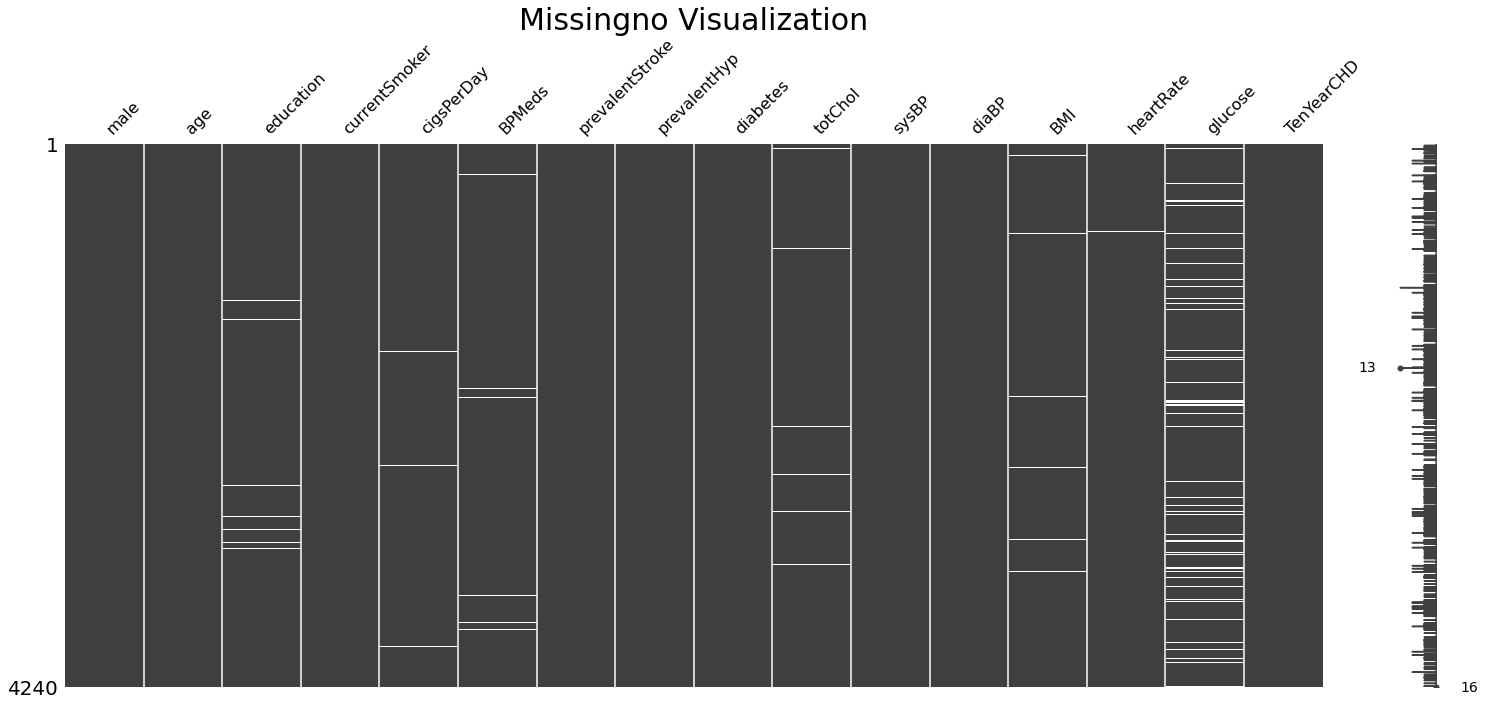

In [12]:
import missingno as msno
msno.matrix(dataFrame)
plt.title('Missingno Visualization', fontsize=30)

In [13]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [14]:
missing_values_table(dataFrame)

Your selected dataframe has 16 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
glucose,388,9.2
education,105,2.5
BPMeds,53,1.2
totChol,50,1.2
cigsPerDay,29,0.7
BMI,19,0.4
heartRate,1,0.0


### <font color=SeaGreen>Imputation<font><a name="impute"></a>

Apply the imputation to education

In [15]:
#Impute the 'education' using Simple imputer 
from sklearn.impute import SimpleImputer
#Replacing the NaNs with the most-frequent sample
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputed_education = imp.fit_transform(dataFrame.loc[:,['education']])
dataFrame['education'] = imputed_education

Apply the imputation to cigsPerDay

In [16]:
#Impute the 'cigsPerDay' using Simple imputer 
#Replacing the NaNs with the mean of samples
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imputed_cigP = imp.fit_transform(dataFrame.loc[:,['cigsPerDay']])
dataFrame['cigsPerDay'] = imputed_cigP

Apply the imputation to BPMeds

In [17]:
#Impute the 'BPMeds' using Simple imputer 
#Replacing the NaNs with the most-frequent sample
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputed_BPMeds = imp.fit_transform(dataFrame.loc[:,['BPMeds']])
dataFrame['BPMeds'] = imputed_BPMeds

Apply the imputation to totChol

In [18]:
#Impute the 'totChol' using Simple imputer 
#Replacing the NaNs with the mean of samples
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imputed_totChol = imp.fit_transform(dataFrame.loc[:,['totChol']])
dataFrame['totChol'] = imputed_totChol

Apply the imputation to glucose

In [19]:
#Impute the 'glucose' using Simple imputer 
#Replacing the NaNs with the mean of samples
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imputed_glucose = imp.fit_transform(dataFrame.loc[:,['glucose']])
dataFrame['glucose'] = imputed_glucose

Since the number of NANs in the  BMI and hearRate is very low we can drop them out.

In [20]:
dataFrame.dropna(axis=0,inplace=True)
dataFrame.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### <font color=SeaGreen>Distribution and Correlation<font><a name="figure"></a>

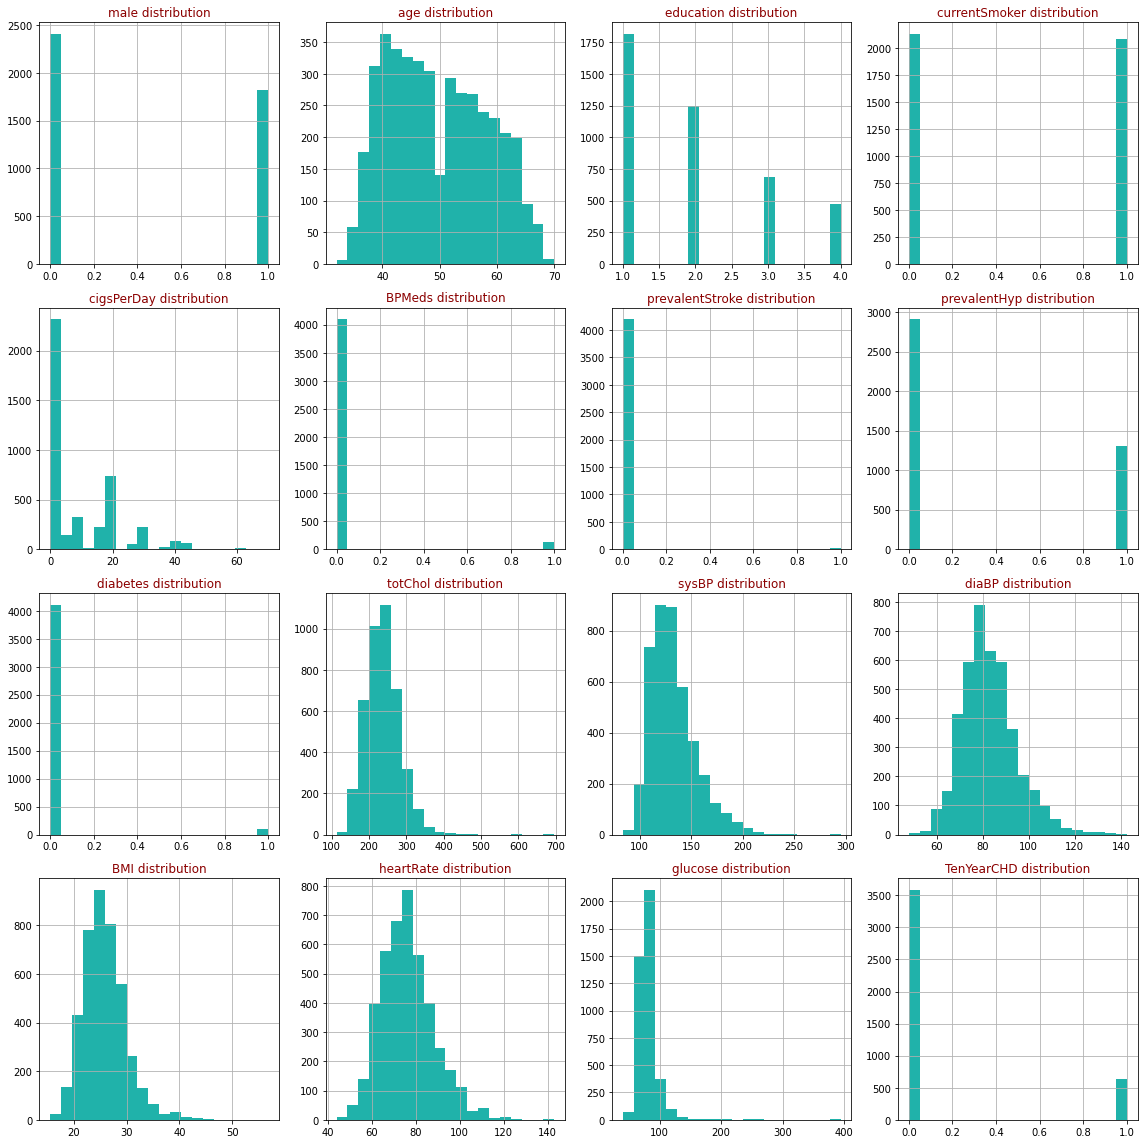

In [22]:
fig=plt.figure(figsize=(16,16))
for index, column in enumerate(dataFrame.columns):
    ax=fig.add_subplot(4,4,index+1)
    dataFrame[column].hist(bins=20,ax=ax,facecolor='LightSeaGreen')
    ax.set_title(column + " distribution",color='darkred')
          
fig.tight_layout()  
plt.show()


Observation:

>cigsPerDay is not normally distributed. Seems to have multiple peaks.
age is not normally distributed. Most age is in the range 40 to 60.
remaining numerical features seems to follow normal distribution, but there are long tails in glucose, heartRate.

Correlation
>Checking which features are correlated with each other and/or the outcome variable

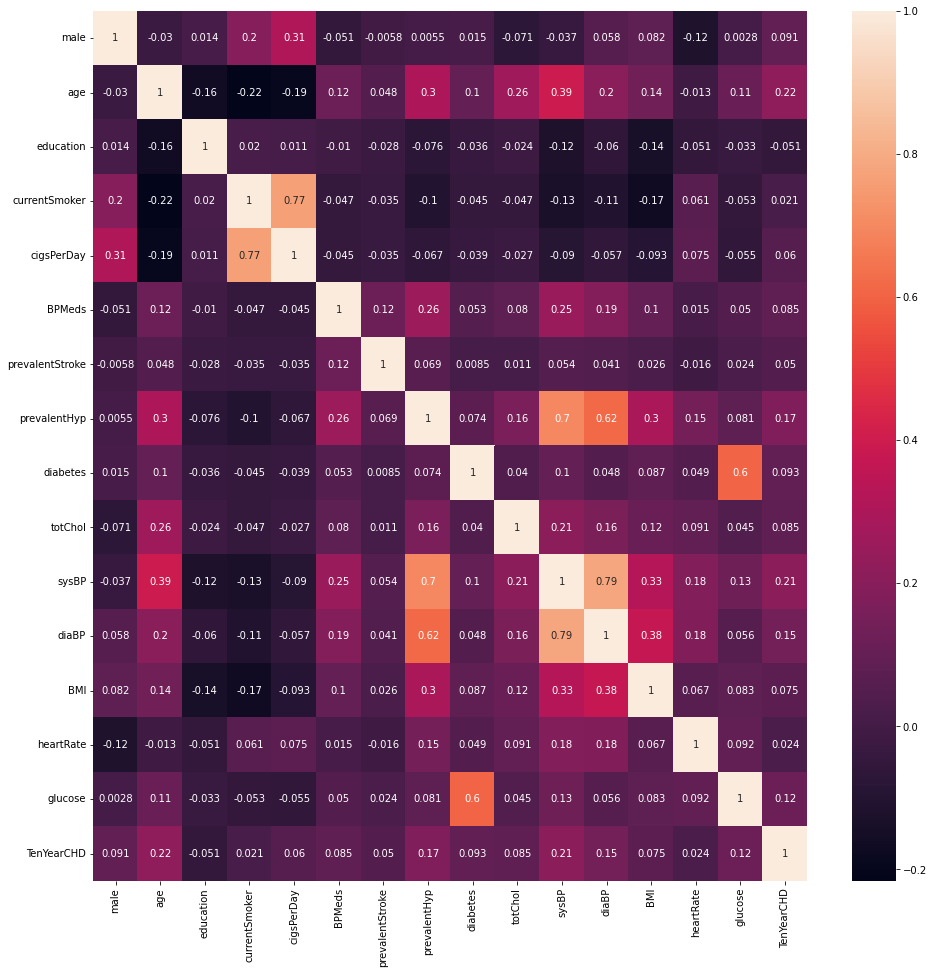

In [23]:
f, ax = plt.subplots(figsize=(16,16))
sn.heatmap(dataFrame.corr(), annot = True, ax = ax)


Observation:
>There seems to be a decently strong correlation between sysBP and diaBP



 ### <font color=SeaGreen>Check the outliers</font><a name="outlier"></a>
 ---
 Before putting our data through machine learning algorithms we should make sure:

1.   Our data does not have any outliers.<br>
2.   Our data is not highly skewed.
3.   There is no multi-collinearity in our data.


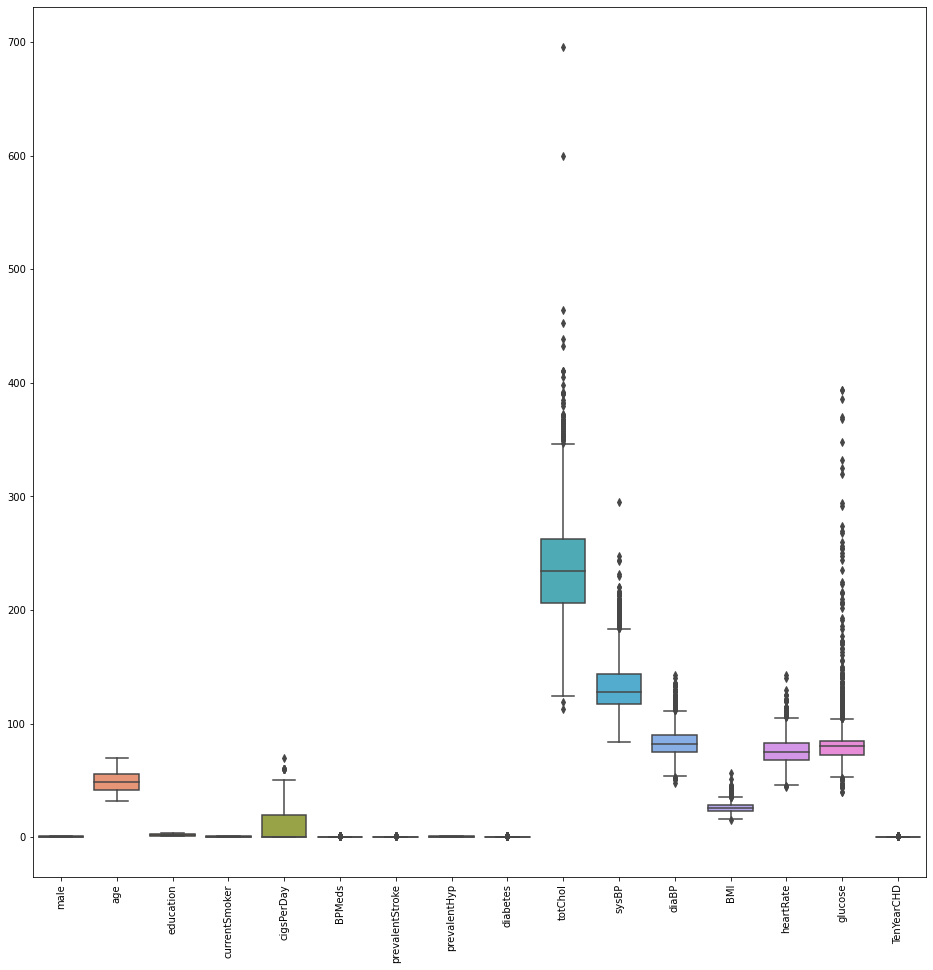

In [24]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(16,16), facecolor='w')
sn.boxplot(data=dataFrame)
plt.xticks(rotation = 90)
plt.show()

lets take a closer look at by excluding some of the columns from the plot in order to zooming in to some information


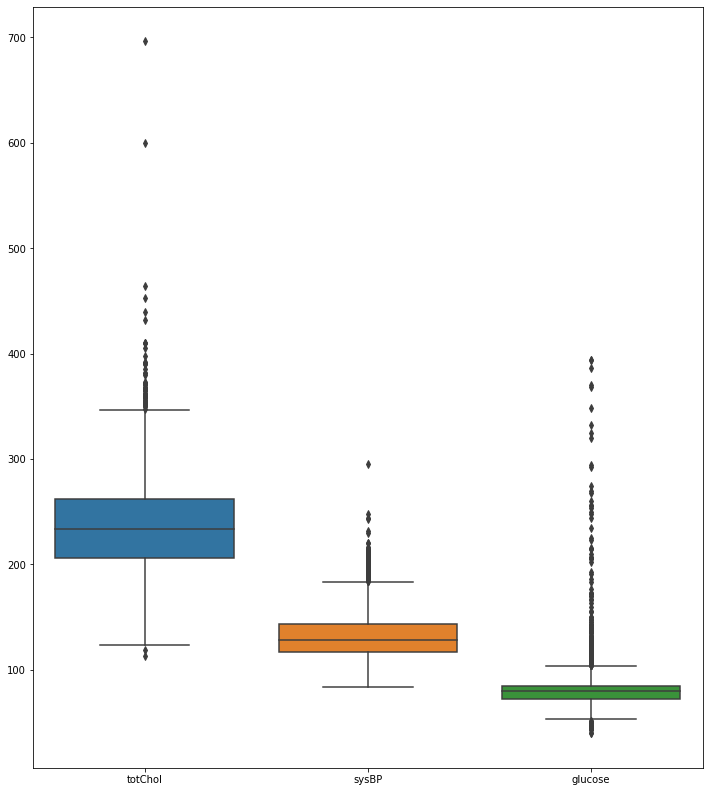

In [25]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(12,14), facecolor='w')
sn.boxplot(data=dataFrame[['totChol','sysBP', 'glucose']])


>From the generated boxplot we can conclude:
We have outliers in the following columns: totChol, sysBP glucose. in the general view of the boxplot there has also seen some other outliers.<br>
As the assumption states that there should be no outliers in our data, we will try to manipulate the data to fit in our range.

 ##### <font color=SeaGreen>Outliers in ***totChol***

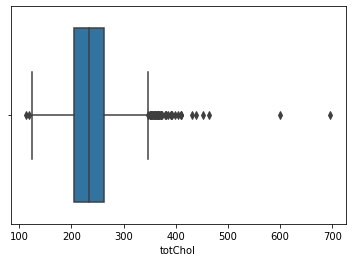

In [26]:
sn.boxplot(dataFrame.totChol)

In [27]:
outliers_chol = dataFrame[(dataFrame['totChol'] > 500)] 
outliers_chol

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,2.0,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1.0,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


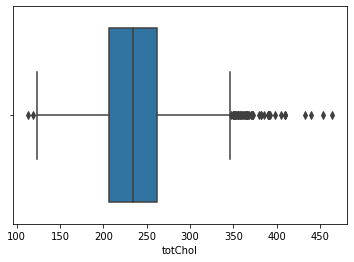

In [28]:
# Dropping 2 outliers in cholesterin
dataFrame = dataFrame.drop(dataFrame[dataFrame.totChol > 500].index)
sn.boxplot(dataFrame.totChol)

##### <font color=SeaGreen>Outliers in ***sysBP***

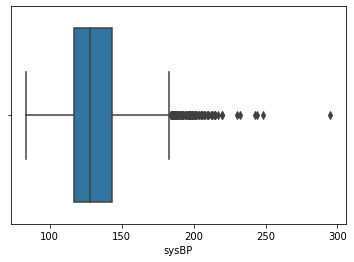

In [29]:
sn.boxplot(dataFrame.sysBP)

In [30]:
outliers_sysBP = dataFrame[(dataFrame['sysBP'] > 250)] 
outliers_sysBP

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
481,0,64,1.0,0,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1


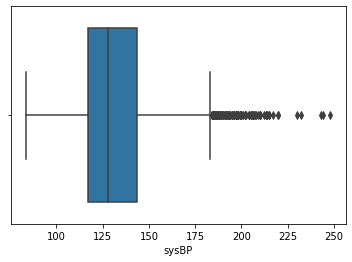

In [31]:
# Dropping 1 outliers in sysBp
dataFrame = dataFrame.drop(dataFrame[dataFrame.sysBP > 250].index)
sn.boxplot(dataFrame.sysBP)

 ##### <font color=SeaGreen>Outliers in ***glucose***

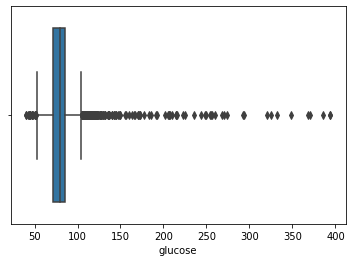

In [32]:
sn.boxplot(dataFrame.glucose)

In [33]:
outliers_glucose = dataFrame[(dataFrame['glucose'] > 290)] 
outliers_glucose

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1363,1,55,1.0,1,40.0,0.0,0,0,1,205.0,127.0,76.0,22.24,90.0,325.0,1
1674,1,56,3.0,0,0.0,0.0,0,0,1,214.0,115.0,80.0,25.09,70.0,292.0,1
2406,0,62,1.0,0,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0
2801,0,47,1.0,1,1.0,0.0,0,1,1,160.0,197.0,109.0,34.91,82.0,320.0,1
2893,1,62,3.0,0,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1
2909,0,67,2.0,0,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
3749,0,54,1.0,0,0.0,0.0,0,0,1,223.0,110.0,67.5,21.22,78.0,294.0,0
3817,1,47,2.0,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0,1
3844,0,62,3.0,1,20.0,1.0,0,1,1,358.0,215.0,110.0,37.62,110.0,368.0,1
3849,0,46,2.0,1,15.0,0.0,0,0,1,233.0,106.0,60.0,20.84,75.0,348.0,0


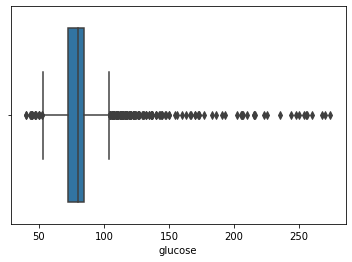

In [34]:
# Dropping 11 outliers in glucose
dataFrame = dataFrame.drop(dataFrame[dataFrame.glucose > 290].index)
sn.boxplot(dataFrame.glucose)

### <font color=SeaGreen>Scaling<font><a name=scaling></a>
---

we are going to transform all the data to the range (0,1).

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(dataFrame), columns=dataFrame.columns)

In [36]:
df_scaled.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.233618,0.136778,0.232804,0.277024,0.363636,0.158120,0.0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.390313,0.227964,0.349206,0.319680,0.515152,0.153846,0.0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.376068,0.267477,0.338624,0.237518,0.313131,0.128205,0.0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.319088,0.404255,0.497354,0.316045,0.212121,0.269231,1.0
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.490028,0.282675,0.380952,0.183228,0.414141,0.192308,0.0


### <font color=SeaGreen>Balancing<font><a name=balancing></a>
---

In [37]:
df_scaled.TenYearCHD.value_counts()

0.0    3582
1.0     624
Name: TenYearCHD, dtype: int64

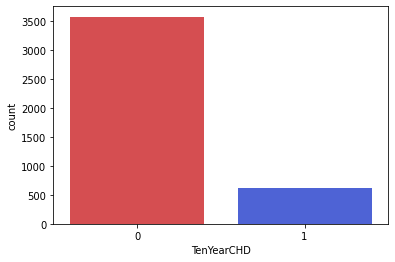

In [38]:
sn.countplot(x='TenYearCHD',data=dataFrame,palette=["#eb383b","#3853eb"])

As it can be seen from the figure above, our target feature is not well balanced. Without balancing, using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate.
To balance it, there are two ways, one is oversampling and another is undersampling. with oversampling we duplicate the minority class in order to balance with majority class. we will use the undersampling method in our case.

Undersampling trys to decrease the number of instances from the majarity class in the data set. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.


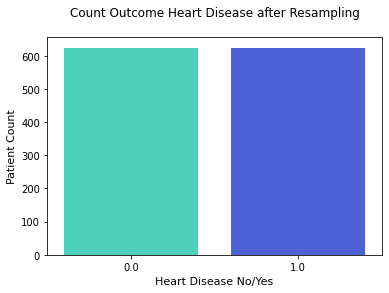

In [43]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=624,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sn.countplot(normalized_df.TenYearCHD, palette=["#37e6cb","#3853eb"])

plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.show()

## <font color=LightSeaGreen>Model Selection<font><a name="model"></a>
---

In this part, we will perform different models such as DT, SVM, MLP, RF 

  -   [1. Decision Tree](#DT)
  -   [2. SVM ](#svm)
  -   [3. MLP ](#mlp)
  -   [4. RF ](#rf)


Before performing different models, we should split our data set into train and test subsets.

In [44]:
from sklearn.model_selection import train_test_split
y = normalized_df['TenYearCHD']
X = normalized_df.drop(['TenYearCHD'], axis = 1)

# divide train test: 75 % - 25 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



#### <font color=SeaGreen>1. Decison Tree<font><a name=DT></a>


In [45]:
from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier()
classifierDT.fit(X_train, y_train)
y_predDT = classifierDT.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

         0.0       0.56      0.57      0.56       162
         1.0       0.53      0.52      0.52       150

    accuracy                           0.54       312
   macro avg       0.54      0.54      0.54       312
weighted avg       0.54      0.54      0.54       312



Text(0.5, 1.0, 'Confusion matrix Decision Tree\n')

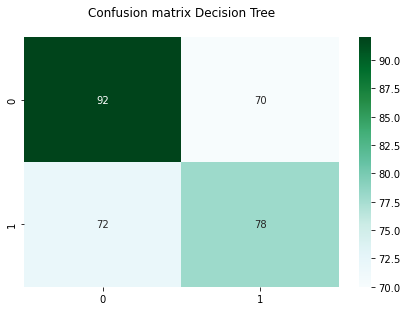

In [46]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_DT = confusion_matrix(y_test,y_predDT)
sn.heatmap(confusion_matrix_DT, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n')


#### <font color=SeaGreen>2. SVM<font><a name=svm></a>



In [49]:
from sklearn.svm import SVC

classifierSVM = SVC()
classifierSVM.fit(X_train, y_train)
y_predSVC = classifierSVM.predict(X_test)
print(classification_report(y_test, y_predSVC))

              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61       162
         1.0       0.59      0.67      0.63       150

    accuracy                           0.62       312
   macro avg       0.62      0.62      0.62       312
weighted avg       0.62      0.62      0.62       312



Text(0.5, 1.0, 'Confusion matrix SVM\n')

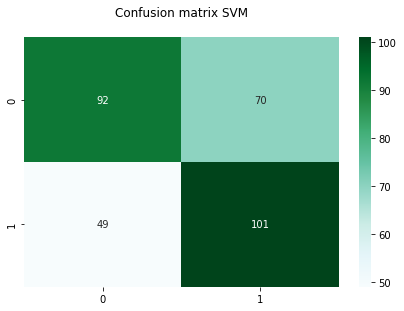

In [50]:
#Plotting Confusion Matrix
confusion_matrix_SVM = confusion_matrix(y_test,y_predSVC)
sn.heatmap(confusion_matrix_SVM , annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix SVM\n')

#### <font color=SeaGreen>3. MLP<font><a name=mlp></a>


In [53]:
from sklearn.neural_network import MLPClassifier
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)
y_predMLP = classifierMLP.predict(X_test)
print(classification_report(y_test, y_predMLP))
classifierMLP.get_params()

              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64       162
         1.0       0.62      0.66      0.64       150

    accuracy                           0.64       312
   macro avg       0.64      0.64      0.64       312
weighted avg       0.64      0.64      0.64       312



{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0.5, 1.0, 'Confusion matrix MLP\n')

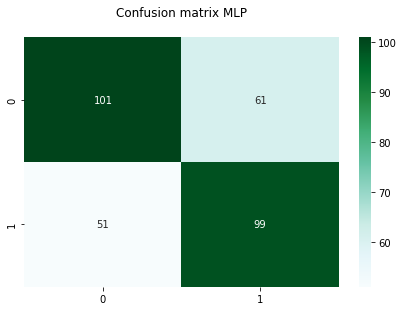

In [54]:
#Plotting Confusion Matrix
confusion_matrix_MLP = confusion_matrix(y_test,y_predMLP)
sn.heatmap(confusion_matrix_MLP , annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix MLP\n')

#### <font color=SeaGreen>4. RF<font><a name=rf></a>


In [57]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(max_depth= 15,n_estimators=20)
classifierRF.fit(X_train, y_train)
y_predRF = classifierRF.predict(X_test)
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         0.0       0.66      0.60      0.63       162
         1.0       0.61      0.67      0.63       150

    accuracy                           0.63       312
   macro avg       0.63      0.63      0.63       312
weighted avg       0.63      0.63      0.63       312



Text(0.5, 1.0, 'Confusion matrix RF\n')

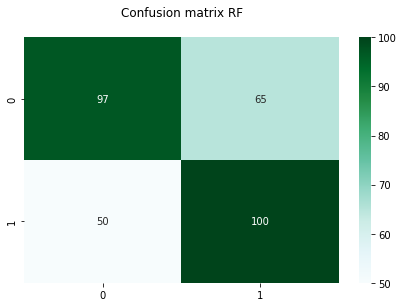

In [58]:
#Plotting Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test,y_predRF)
sn.heatmap(confusion_matrix_RF , annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix RF\n')

Hyperparameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV

#Hyper Parameter Tuning Function
def print_bold(string):
    print("\033[1m" + string + "\033[0m")

def hyper_parameter_tuning(model, X_train, y_train, tuned_parameters, X_test, y_test, with_randomize=False):
  scores = ['precision', 'recall']
  for score in scores:
    print_bold("# Hyper-Parameters Tuning for %s \n" % score)
    
    if with_randomize:
        classifier = RandomizedSearchCV(model, tuned_parameters, scoring='%s_macro' % score)
    else:
        classifier = GridSearchCV(model, tuned_parameters, scoring='%s_macro' % score)
    
    
    classifier.fit(X_train, y_train)
    print("Best parameters set found on development set:\n\n", classifier.best_params_)
    
    print("\nGrid scores on development set:\n")
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
    print("\nDetailed classification report:\n")
    print("The model is trained on the full development set")
    print("The scores are computed on the full evaluation set\n")
    print(
        classification_report(
            y_test, classifier.predict(X_test)
        )
    )

In [60]:
MLP_model = MLPClassifier()
# Setting the hyperparameters to be tuned
tuned_parameters = [{'solver':['adam'],'hidden_layer_sizes':[(18),(20)],'max_iter':range(10,200,10)}]
# Calling the pre-defined get_hyper function
hyper_parameter_tuning(MLP_model, X_train, y_train, tuned_parameters, X_test, y_test)

# Hyper-Parameters Tuning for precision 

Best parameters set found on development set:

 {'hidden_layer_sizes': 18, 'max_iter': 190, 'solver': 'adam'}

Grid scores on development set:

0.460 (+/-0.386) for {'hidden_layer_sizes': 18, 'max_iter': 10, 'solver': 'adam'}
0.532 (+/-0.247) for {'hidden_layer_sizes': 18, 'max_iter': 20, 'solver': 'adam'}
0.621 (+/-0.075) for {'hidden_layer_sizes': 18, 'max_iter': 30, 'solver': 'adam'}
0.640 (+/-0.078) for {'hidden_layer_sizes': 18, 'max_iter': 40, 'solver': 'adam'}
0.640 (+/-0.061) for {'hidden_layer_sizes': 18, 'max_iter': 50, 'solver': 'adam'}
0.642 (+/-0.066) for {'hidden_layer_sizes': 18, 'max_iter': 60, 'solver': 'adam'}
0.629 (+/-0.033) for {'hidden_layer_sizes': 18, 'max_iter': 70, 'solver': 'adam'}
0.651 (+/-0.049) for {'hidden_layer_sizes': 18, 'max_iter': 80, 'solver': 'adam'}
0.663 (+/-0.053) for {'hidden_layer_sizes': 18, 'max_iter': 90, 'solver': 'adam'}
0.655 (+/-0.028) for {'hidden_layer_sizes': 18, 'max_iter': 100, 'solver': '

**Result**: MLP has the highest score

In [61]:
import math
# Check overfit of the MLP model
# accuracy test and train

print(
    f'The Score of the MLPClassifier for Training set {round((classifierMLP.score(X_train.values,y_train.values))*100)}%'
    )
print(
    f'The Score of the MLPClassifier for Test set {round((classifierMLP.score(X_test.values,y_test.values))*100)}%'
    )


The Score of the MLPClassifier for Training set 70%
The Score of the MLPClassifier for Test set 64%


**Result**: The scores for test and training data for the MLP model are very similar. So we do not expect the model to overfit.

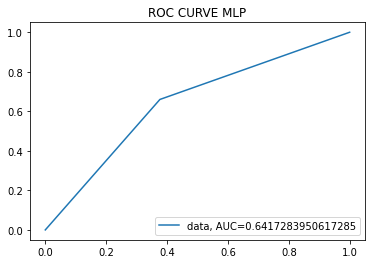

The score for the AUC ROC Curve is: 64.0%


In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

FPRate, TPRate, not_imp = roc_curve(y_test, y_predMLP)
AUC = roc_auc_score(y_test, y_predMLP)
plt.plot(FPRate,TPRate,label="data, AUC="+str(AUC))
plt.legend(loc=4)
plt.title ('ROC CURVE MLP')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(AUC,2)*100}%")

In [64]:
# Forest of Trees
def feature_imp(X,Y):
# Build a forest and compute the impurity-based feature importances
  forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
  # Fitting the model
  forest.fit(X,Y)
  # Calculating the importance of features 
  importances = forest.feature_importances_
  #summarize feature importance
  for i,j in enumerate(importances):
	  print('%s, Score: %.5f' % (X.columns[i],j))
  #return importances as a pandas dataframe 
  return pd.DataFrame(index=X.columns, columns=['importancy'], data=importances)

male, Score: 0.01867
age, Score: 0.13110
education, Score: 0.05208
currentSmoker, Score: 0.01482
cigsPerDay, Score: 0.05354
BPMeds, Score: 0.00845
prevalentStroke, Score: 0.00529
prevalentHyp, Score: 0.02312
diabetes, Score: 0.00821
totChol, Score: 0.11351
sysBP, Score: 0.12539
diaBP, Score: 0.11485
BMI, Score: 0.11312
heartRate, Score: 0.10349
glucose, Score: 0.11433


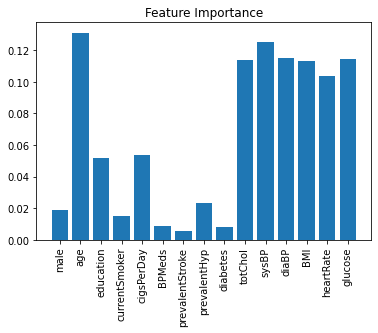

In [65]:
# Definition of training data
#Drop categorical data from dataset using drop() function.
X_tr = dataFrame.drop(['TenYearCHD'], axis=1)
#Set the 'Metrics.Review Score'column as our ground truth 
Y_tr = dataFrame.loc[:,'TenYearCHD']
# Feature Importance analysis
from sklearn.ensemble import ExtraTreesClassifier
#Calling the defined feature importance function
importance_pd = feature_imp(X_tr,Y_tr)
# plot feature importance
plt.figure()
plt.bar([i for i in X_tr.columns], importance_pd['importancy'])
plt.title('Feature Importance')
plt.xticks(rotation = 90)
plt.show()